# Project: Communicate Data Findings (Dataset: Loan Data from prosper)
## by Tae-Hee Cho

## Investigation Overview

> In this presentation. Many visualizations on loans's characterics will be created to study their relationship on borrowers's APR. The main characterics are BorrowerAPR, ProsperScore, Occupation etc.

## Dataset Overview

> The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, status, borrowed amount, debt, etc. Variables with many missing values were dropped to make the Dataset more accurate. This study will be analyzing factors that could inflence borrow's APR and which loans were taken by what type of borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
sns.set(style="darkgrid")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe


df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.loc[df['TotalProsperLoans'].isna(), 'PastBorrower'] = 'No'
df.loc[df['TotalProsperLoans'] == 0, 'PastBorrower'] = 'No'
df.loc[df['TotalProsperLoans'] > 0, 'PastBorrower'] = 'Yes'

df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype(str)
df.replace({'ListingCategory (numeric)':{'0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement',
                                        '3': 'Business', '4': 'Personal Loan', '5': 'Student Use', '6': 'Auto',
                                        '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure',
                                        '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses',
                                        '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle',
                                        '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'}},
          inplace = True)

df['StatedAnnualIncome'] = df['StatedMonthlyIncome'] * 12

df = df[df['ProsperScore'].isnull()==False]

In [4]:
df_clean = df.copy()

columns = ['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanNumber','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
           'ProsperRating(Alpha)', 'ListingCategory (numeric)', 'ProsperScore','BorrowerState','Occupation', 
           'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'AmountDelinquent',
           'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
           'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'PastBorrower', 'Investors',
           'CurrentDelinquencies', 'AmountDelinquent', 'StatedAnnualIncome']
df_clean = df_clean.loc[:,columns]

## Distribution of Borrowers

> _Observe the counts for all borrowers, most of borrowers have verifiable incomes and home. And it also shows that most of borrowers have no previous loan records, and their Prosper Scores are mostly between 4 and 9._

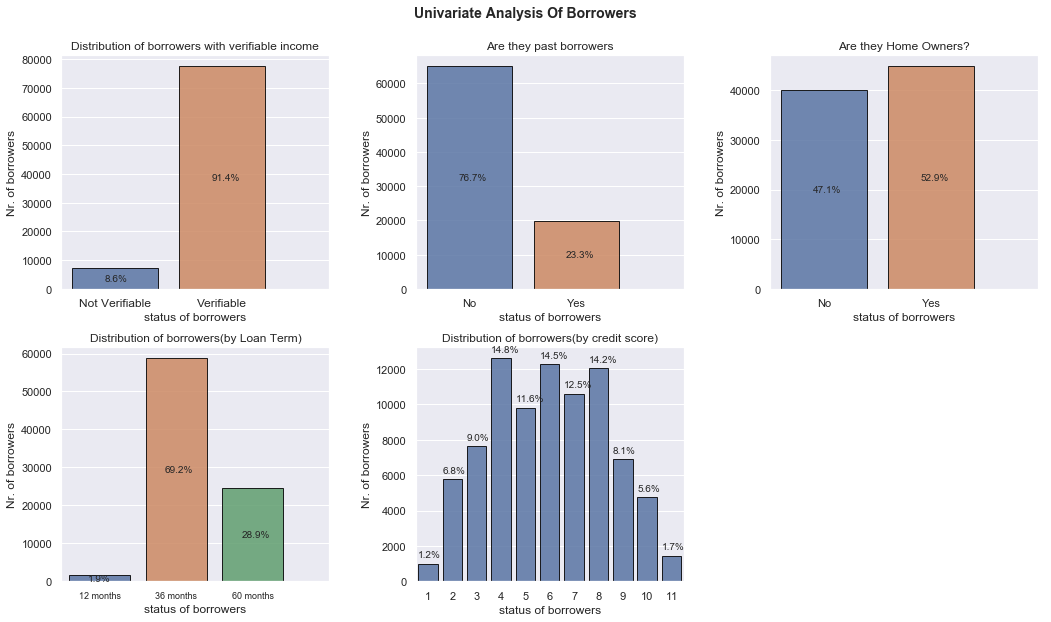

In [5]:
# Setting figsize as follows to use the A4(portrait) height with a 16/9 aspect ratio.
# (the aspect ratio for most computer screens (and projectors) is 16/9)
plt.figure(figsize=(14.70, 8.27))
base_color = sns.color_palette()[0]



# Distribution of borrowers based on proof of income
# and using for loops to show the percentage of each bar.
plt.subplot(2, 3, 1)
sns.countplot(data = df_clean, x = 'IncomeVerifiable', ec = 'black', alpha = 0.85)
plt.title("Distribution of borrowers with verifiable income");
plt.ylabel('Nr. of borrowers')
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['IncomeVerifiable'].value_counts().index) + 1), 
           labels = ['Not Verifiable', 'Verifiable'], fontsize = 12)
for i in np.arange(len(df_clean['IncomeVerifiable'].value_counts().index)):
    count = df_clean['IncomeVerifiable'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['IncomeVerifiable'].value_counts().sum())
    plt.text(i-0.1, count/2, pct_string, va = 'center')

# Distribution of borrowers based on previous borrowing records
plt.subplot(2, 3, 2)
sns.countplot(data = df_clean, x = 'PastBorrower', ec = 'black', alpha = 0.85)
plt.title("Are they past borrowers");
plt.ylabel('Nr. of borrowers')
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['PastBorrower'].value_counts().index) + 1), 
           labels = ['No', 'Yes'])
for i in np.arange(len(df_clean['PastBorrower'].value_counts().index)):
    count = df_clean['PastBorrower'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['PastBorrower'].value_counts().sum())
    plt.text(i-0.1, count/2, pct_string, va = 'center')

# Distriution of borrowers based on real estate holdings
plt.subplot(2, 3, 3)
sns.countplot(data = df_clean, x = 'IsBorrowerHomeowner', ec = 'black', alpha = 0.85)
plt.title("Are they Home Owners?");
plt.ylabel('Nr. of borrowers');
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['IsBorrowerHomeowner'].value_counts().index) + 1), 
           labels = ['No', 'Yes'])
for i in np.arange(len(df_clean['IsBorrowerHomeowner'].value_counts().index)):
    count = df_clean['IsBorrowerHomeowner'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['IsBorrowerHomeowner'].value_counts().sum())
    plt.text(i-0.1, count/2, pct_string, va = 'center')


# Distribution of borrower based on loan term
plt.subplot(2, 3, 4)
sns.countplot(data = df_clean, x = 'Term', ec = 'black', alpha = 0.85)
plt.title("Distribution of borrowers(by Loan Term)");
plt.ylabel('Nr. of borrowers');
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['Term'].value_counts().index) + 1),
           labels = ['12 months', '36 months', '60 months'], fontsize = 9)
num = 0
for i in df_clean['Term'].value_counts().sort_index(ascending = True).index:    
    count = df_clean['Term'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['Term'].value_counts().sum())
    plt.text(num-0.15, count/2, pct_string, va = 'center')
    num += 1
    

# Distribution of borrwers based on Prosper Score.
plt.subplot(2, 3, 5)
sns.countplot(data = df_clean, x = 'ProsperScore', color = base_color,
              order = np.arange(1, 12, 1), ec = 'black', alpha = 0.85)
plt.title("Distribution of borrowers(by credit score)");
for i in np.arange(df_clean['ProsperScore'].value_counts().index.min(),
                   len(df_clean['ProsperScore'].value_counts().index)+1, 1):
    count = df_clean['ProsperScore'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['ProsperScore'].value_counts().sum())
    plt.text(i-1.4, count + 500, pct_string, va = 'center')
plt.ylabel('Nr. of borrowers');
plt.xlabel('status of borrowers')

plt.subplots_adjust(hspace=0.5, wspace=0.5);
plt.suptitle("Univariate Analysis of Borrowers".title(),
               fontsize = 14, weight = "bold", y = 1.04)
plt.tight_layout();

> _Most of the borrowers have proof of income and real estate as well as previous loan records. And in most of the cases, The life of loans 3 years. Also, there is roughly one normal distribution in credit score subplot with two exceptional high counts when Score 4 and Score 8  are  and 14.8% and 14.2%_

## Distribution of Borrower APR by each Prosper Score

> _FacetGrid of Distribution of Borrwer APR are made on the basis of Prosper Score. And we could easily know that the distribution Borrower APR leans more toward lower percentages as Prosper Score goes higher._

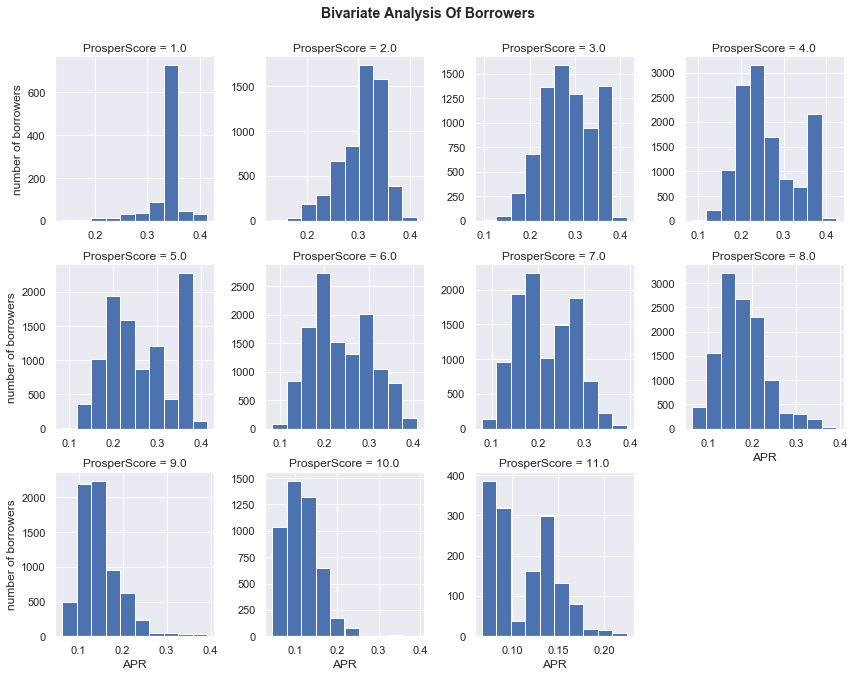

In [6]:
g = sns.FacetGrid(data = df_clean, col = 'ProsperScore', col_wrap = 4, sharey= False, sharex= False)
g.map(plt.hist, 'BorrowerAPR').set_axis_labels('APR','number of borrowers');

plt.suptitle("Bivariate Analysis of Borrowers".title(), fontsize = 14, weight = "bold", y = 1.04)
plt.tight_layout(); 

> _Visually assessing the facet grid, we could somehow see that distribution of borrowers incline toward lower APR range as ProsperScore gets higher.(negatively correlated)_

## Linear Correlation between APR and Prosper Score
> _The visualisation looks into the linear relationship between two variable: Borrower APR and Prosper Score._

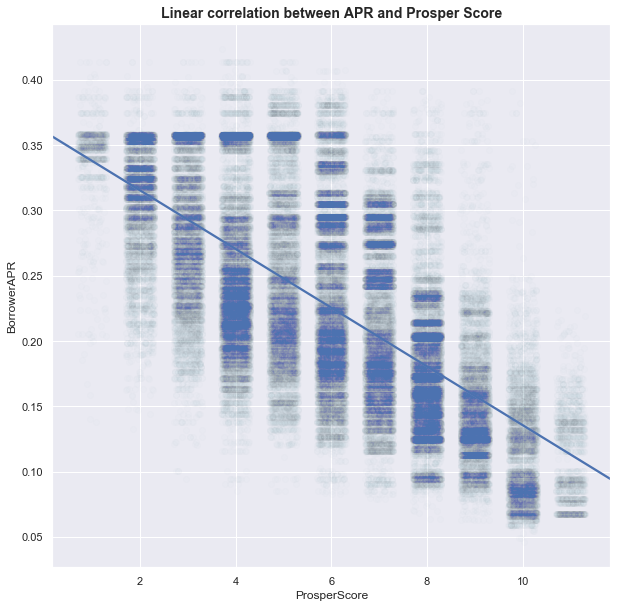

In [7]:
plt.figure(figsize=(10,10))

plt.title('Linear correlation between APR and Prosper Score', fontsize = 14, weight = 'bold')
sns.regplot(data = df_clean, x = 'ProsperScore', y = 'BorrowerAPR',
            x_jitter = 0.3, scatter_kws = {'alpha': 1/150});

> _We could prove the conclusion of previous visualization, from a different perspective, that ProsperScore has the strong relationship with Borrower's APR (negatively correlated)._

## Reference Table
> The Reference Table of Borrower APR values based on Occupation and Listing Category is made. So the creditor(Prosper) could decide optimum APR for each potential borrower.

In [8]:
sum_of_loan_by_occupation = df_clean.groupby('Occupation')['LoanNumber'].sum().sort_values(ascending = False).reset_index()
occupation_avg_score = df_clean.groupby(['Occupation', 'ListingCategory (numeric)'])['BorrowerAPR'].mean().reset_index(name = 'avg score')
occupation_avg_score = occupation_avg_score.pivot(index = 'Occupation', columns = 'ListingCategory (numeric)', values = 'avg score')
occupation_avg_score = occupation_avg_score.reindex(sum_of_loan_by_occupation['Occupation'])

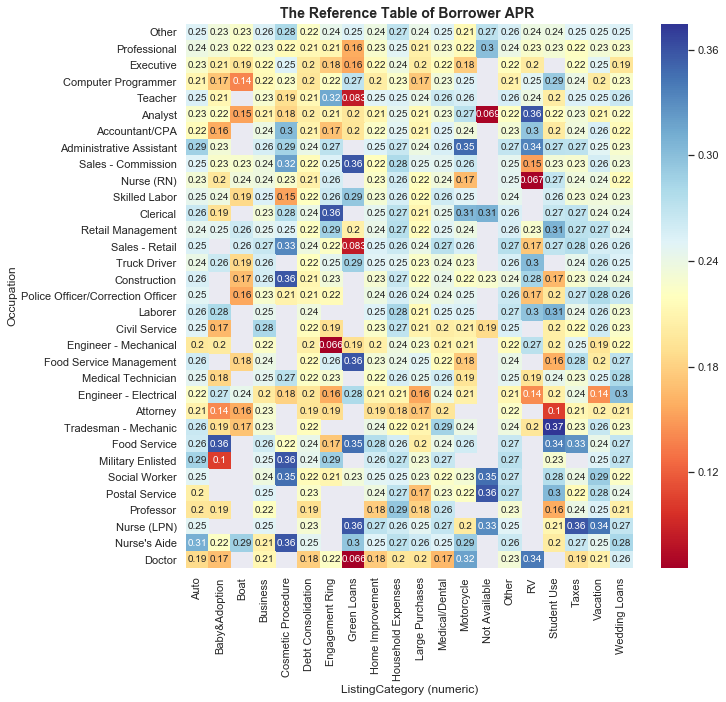

In [9]:
plt.figure(figsize=(10,10))
plt.title('The Reference Table of Borrower APR ', fontsize = 14, weight = "bold")
sns.heatmap(occupation_avg_score.iloc[:int(len(occupation_avg_score)/2)],
            annot = True, cmap="RdYlBu");

> _Rather than providing an insight, the table is made so that the creditor(Prosper) could decide optimum APR for each potential borrower(from different occupation) in varying cases as above._

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!